Dataset({
    features: ['video', 'caption', 'row_id', 'revised_caption', 'action_score', 'status', 'assigned_to', 'assigned_at', 'build_up', 'peak_start', 'peak_end', 'drop_off', 'peaks'],
    num_rows: 1037
})

--------------------------------------------------



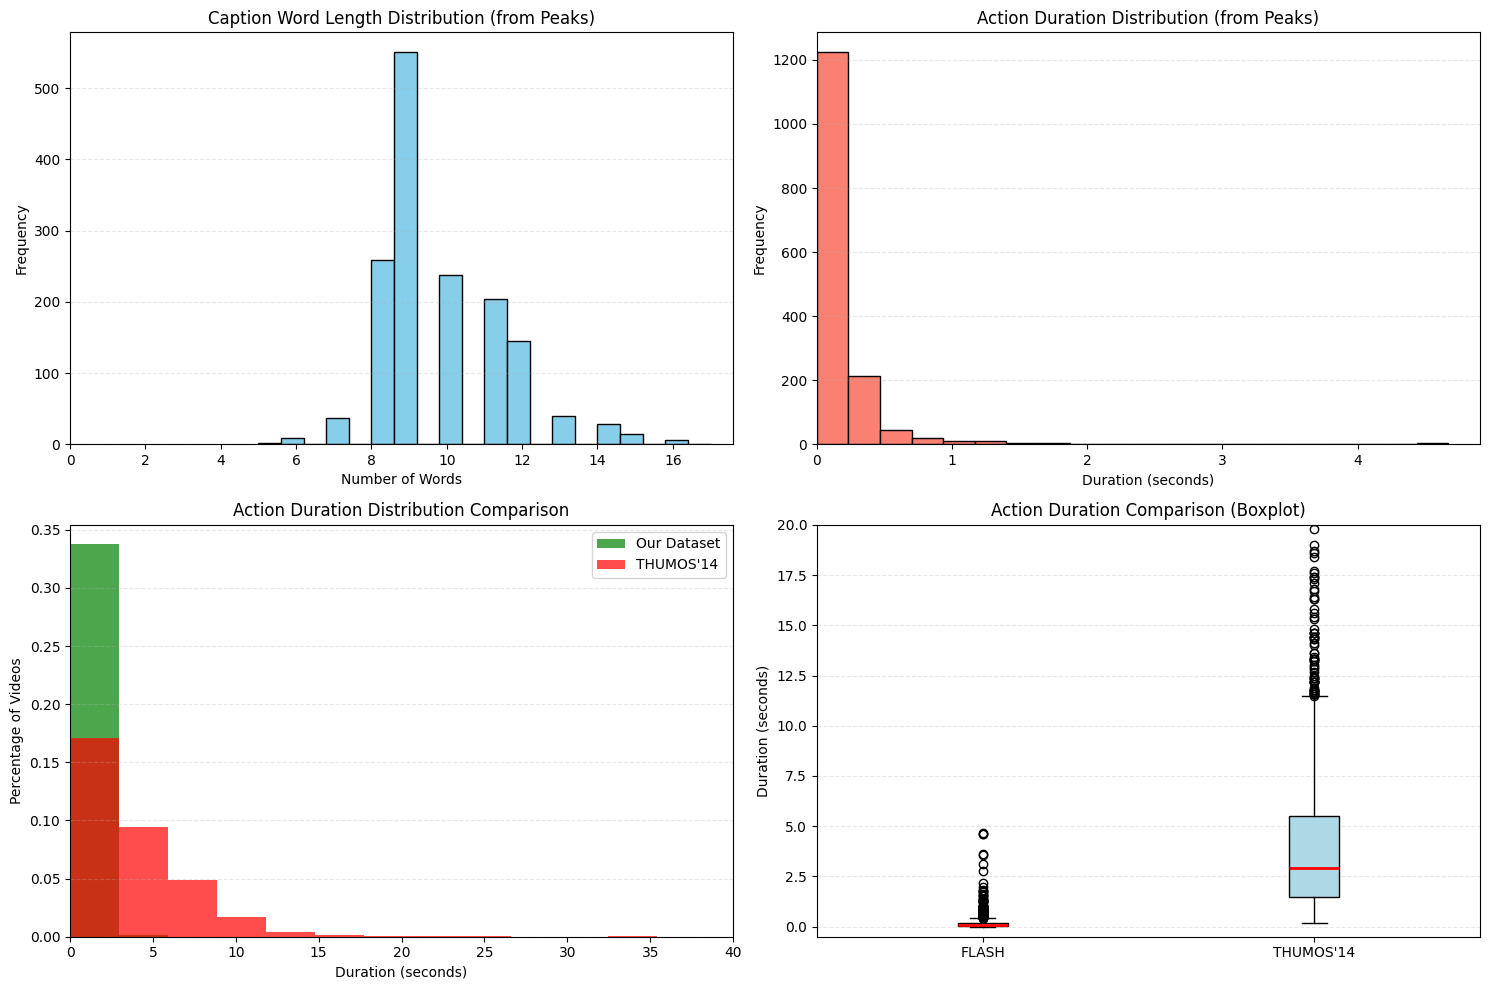


╒═══════════╤═════════╤════════╤══════════╤═══════╤═══════╤═══════╤════════╕
│ dataset   │   count │   mean │   median │   q25 │   q75 │   min │    max │
╞═══════════╪═════════╪════════╪══════════╪═══════╪═══════╪═══════╪════════╡
│ FLASH     │    1536 │   0.18 │     0.10 │  0.03 │  0.19 │  0.00 │   4.67 │
├───────────┼─────────┼────────┼──────────┼───────┼───────┼───────┼────────┤
│ THUMOS'14 │    3007 │   4.04 │     2.90 │  1.50 │  5.50 │  0.20 │ 118.10 │
╘═══════════╧═════════╧════════╧══════════╧═══════╧═══════╧═══════╧════════╛


In [1]:
from datasets import *
from iv2_utils import iv2
from utils import plot_caption_and_duration_distributions, plot_peak_dataset_stats
from datasets import load_dataset, Dataset
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import random
import torch
import json
import os

dataset = Dataset.from_csv('labeling_tasks_cleaned.csv')

print(dataset)

print('\n' + '-'*50 + '\n')

plot_peak_dataset_stats(dataset)

In [ ]:
dataset[0]

In [ ]:
import os
import subprocess

# 1) Collect, dedupe, and keep only files that actually exist
seen = set()
videos = []
for p in dataset["video"]:
    if p and os.path.exists(p) and p not in seen:
        videos.append(p)
        seen.add(p)

# Optional: see how many were missing
missing = [p for p in dataset["video"] if p and not os.path.exists(p)]
print(f"{len(videos)} to archive, {len(missing)} missing")

# 2) Write a file list for tar
with open("files_to_tar.txt", "w") as f:
    for p in videos:
        f.write(p + "\n")

# 3) Create the archive
subprocess.run(["tar", "-czvf", "flash_videos.tar.gz", "-T", "files_to_tar.txt"], check=True)
